# Âü∫Á°ÄÂáÜÂ§á

In [1]:
#ÂáÜÂ§áÂ∑•‰Ωú
#ÂØºÂÖ•ÊâÄÈúÄÁöÑÂåÖÂíåÈÖçÁΩÆÁéØÂ¢É
# ÂØºÂÖ•Â∑•ÂÖ∑ÂåÖ
import re, jieba#Áî®‰∫é‰∏≠ÊñáÂàÜËØç
from collections import Counter

import matplotlib.pyplot as plt
import random
import numpy as np 
import seaborn as sns
import pandas as pd
import pyecharts.options as opts
import pyecharts

from wordcloud import WordCloud #Áî®‰∫éÁîüÊàêËØç‰∫ëÂõæ
from PIL import Image #Áî®‰∫éÂ§ÑÁêÜÂõæÂÉèÊï∞ÊçÆ

from IPython.display import Math,display,Latex
import math
from numpy import sin


plt.rcParams["font.sans-serif"]=["SimHei"]#‰∏≠ÊñáÊ†ºÂºè
plt.rcParams['axes.unicode_minus'] =False #Ëøô‰∏™‰ª£Á†ÅÂèØ‰ª•Ëß£ÂÜ≥matploitË¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
%matplotlib inline
# ÈÖçÁΩÆÂ≠ó‰ΩìÂèÇÊï∞ÔºàseabornÈúÄË¶Å‰øÆÊîπrcÂèÇÊï∞ÂÆûÁé∞‰∏≠ÊñáËæìÂÖ•Ôºâ
rc = {'font.sans-serif': 'SimHei', 'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)


# Â∏∏ËßÑÊï∞ÊçÆÊï¥ÁêÜ

In [35]:
# ËØªÂèñCSVÊñá‰ª∂
df = pd.read_csv('outputpro.csv')

# ÊòæÁ§∫Êï∞ÊçÆÁöÑÂâçÂá†Ë°åÔºåÁ°Æ‰øùÊï∞ÊçÆÂØºÂÖ•ÊàêÂäü
print(df.head())

   ÂèëÈÄÅ‰∫∫        Ê∂àÊÅØÂÜÖÂÆπ                       ÁâπÊÆäÂÜÖÂÆπ  Ê∂àÊÅØÊó∂Èó¥Âπ¥  Ê∂àÊÅØÊó∂Èó¥Êúà  Ê∂àÊÅØÊó∂Èó¥Êó•       Ê∂àÊÅØÊó•Êúü  \
0  Âº†Èí∞Áë∂  Êãâ‰Ω†ÁöÑÂ∞èÂ≠©@ÁªçÁÖú                          NaN   2023      4     24  2023/4/24   
1   Á≥ªÁªü              "Â∑•ÂïÜÂº†Èí∞Áë∂"ÈÇÄËØ∑‰Ω†Âíå"ÊòüÊòüÊò•Âõ∞"Âä†ÂÖ•‰∫ÜÁæ§ËÅä:     2023      4     24  2023/4/24   
2  Âº†Èí∞Áë∂  ÊãâÊü≥‰Ω≥@ÊòüÊòüÊò•Âõ∞                          NaN   2023      4     24  2023/4/24   
3   Á≥ªÁªü                 "Â∑•ÂïÜÂº†Èí∞Áë∂"‰øÆÊîπÁæ§Âêç‰∏∫‚ÄúÂçäÂÜ≥ËµõÊ≠£Êñπ‚Äù:     2023      4     24  2023/4/24   
4   Á≥ªÁªü                  ‰Ω†ÈÇÄËØ∑"ÂæêÈì≠„ÄÅÂº†Ê∂¶Ê∂µ"Âä†ÂÖ•‰∫ÜÁæ§ËÅä  :     2023      4     24  2023/4/24   

   Ê∂àÊÅØÊó∂Èó¥Êó∂  Ê∂àÊÅØÊó∂Èó¥ÂàÜ   Ê∂àÊÅØÊó∂Èó¥  Unnamed: 10  Unnamed: 11  
0     11     12  11:12          NaN          NaN  
1     11     12  11:12          NaN          NaN  
2     11     12  11:12          NaN          NaN  
3     11     13  11:13          NaN          NaN  
4     11     13  11:

In [3]:
# ÊåâÁÖßÂèëÈÄÅ‰∫∫ÂíåÊúà‰ªΩËøõË°åÂàÜÁªÑÁªüËÆ°ÂèëË®ÄÈ¢ëÁéá
monthly_freq = df.groupby(['ÂèëÈÄÅ‰∫∫', 'Ê∂àÊÅØÊó∂Èó¥Êúà']).size().reset_index(name='ÂèëË®ÄÈ¢ëÁéá')

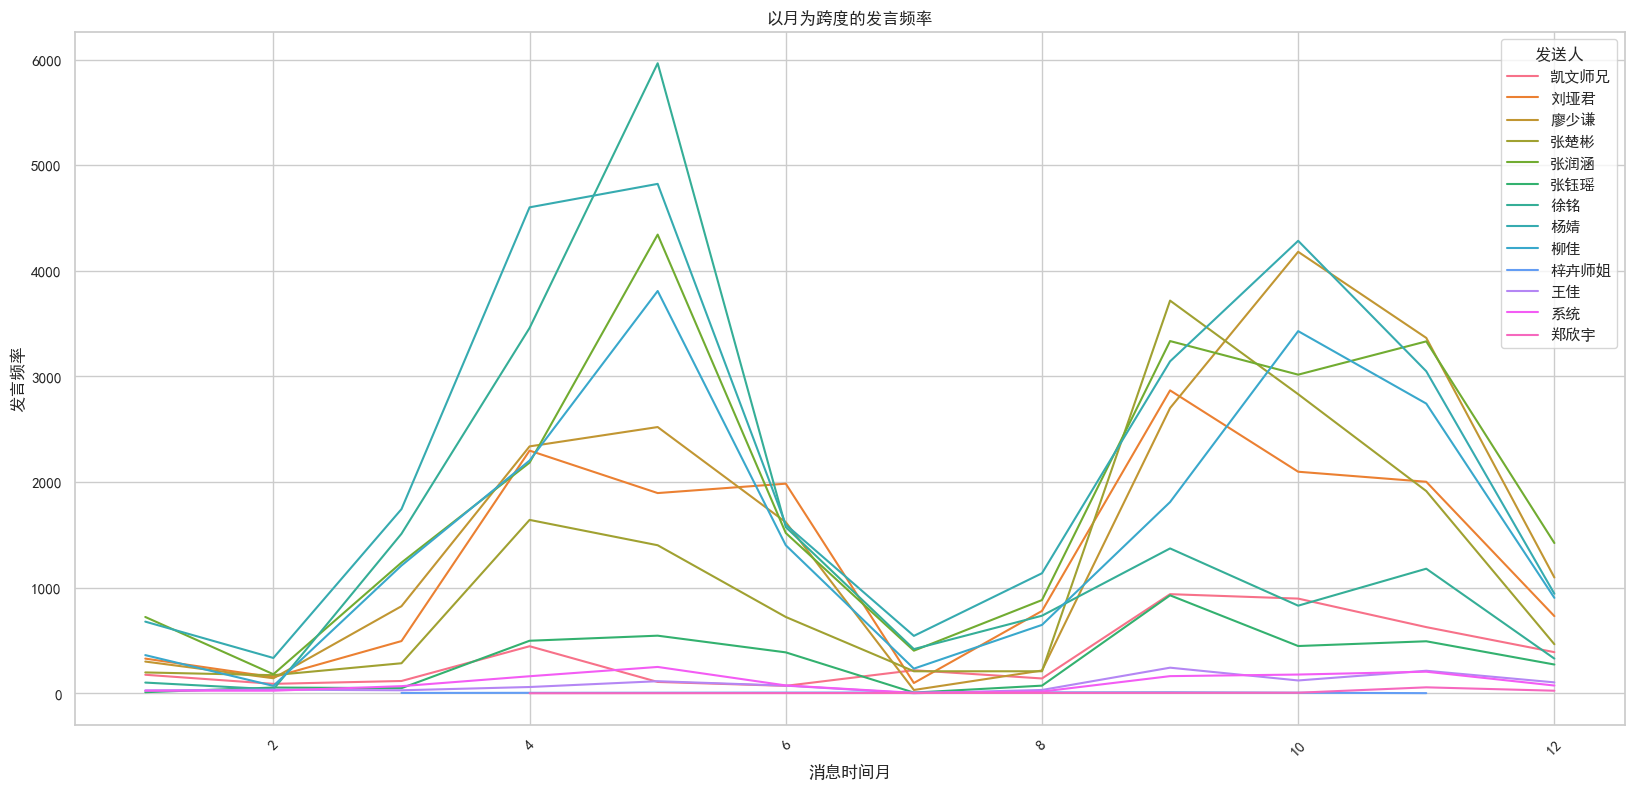

In [4]:
# ËÆæÁΩÆÂõæÂΩ¢È£éÊ†º

sns.set(style="whitegrid")
# ÁªòÂà∂‰ª•Êúà‰∏∫Ë∑®Â∫¶ÁöÑÂèëË®ÄÈ¢ëÁéáÂõæ
plt.rcParams["font.sans-serif"]=["SimHei"]#‰∏≠ÊñáÊ†ºÂºè
plt.rcParams['axes.unicode_minus'] =False #Ëøô‰∏™‰ª£Á†ÅÂèØ‰ª•Ëß£ÂÜ≥matploitË¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
plt.figure(figsize=(20, 9))
sns.lineplot(x='Ê∂àÊÅØÊó∂Èó¥Êúà', y='ÂèëË®ÄÈ¢ëÁéá', hue='ÂèëÈÄÅ‰∫∫', data=monthly_freq)
plt.title('‰ª•Êúà‰∏∫Ë∑®Â∫¶ÁöÑÂèëË®ÄÈ¢ëÁéá')
plt.xlabel('Ê∂àÊÅØÊó∂Èó¥Êúà')
plt.ylabel('ÂèëË®ÄÈ¢ëÁéá')
plt.xticks(rotation=45)
plt.show()


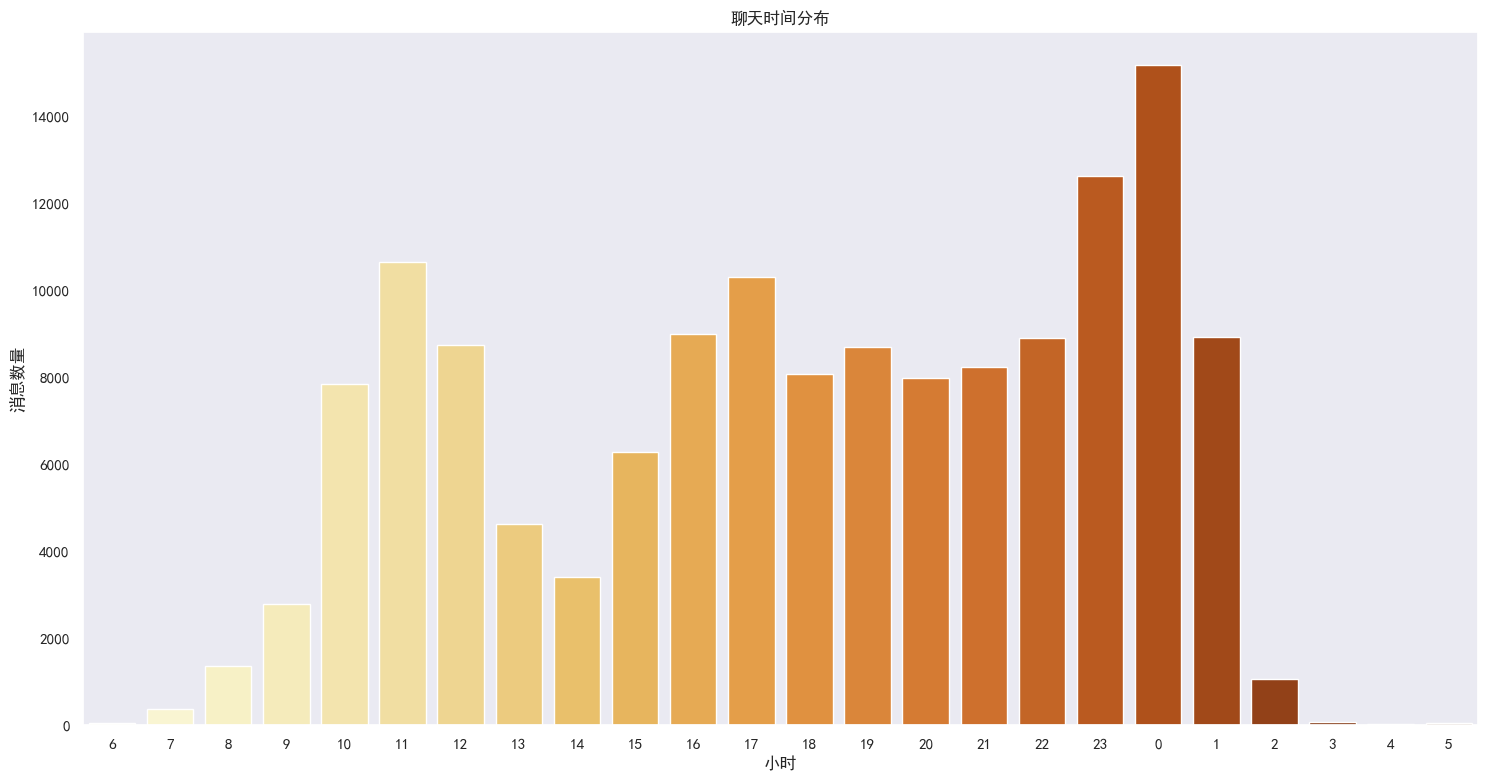

In [5]:
# ÊåâÂ∞èÊó∂ÁªüËÆ°Ê∂àÊÅØÊï∞Èáè
hourly_distribution = df.groupby('Ê∂àÊÅØÊó∂Èó¥Êó∂').size().reset_index(name='Ê∂àÊÅØÊï∞Èáè')
sns.set(style="dark")
plt.rcParams["font.sans-serif"]=["SimHei"]#‰∏≠ÊñáÊ†ºÂºè
plt.rcParams['axes.unicode_minus'] =False #Ëøô‰∏™‰ª£Á†ÅÂèØ‰ª•Ëß£ÂÜ≥matploitË¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
# Â∞Ü x ËΩ¥ÂàªÂ∫¶ËÆæÂÆö‰∏∫ÊåáÂÆöÁöÑÂ∞èÊó∂ËåÉÂõ¥Ôºà7ÁÇπÂà∞24ÁÇπÔºåÂÜçÂà∞0ÁÇπÔºåÂÜçÂà∞6ÁÇπÔºâ
custom_hours = [6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5]
hourly_distribution['Ê∂àÊÅØÊó∂Èó¥Êó∂'] = pd.Categorical(hourly_distribution['Ê∂àÊÅØÊó∂Èó¥Êó∂'], categories=custom_hours, ordered=True)

# ÁªòÂà∂ËÅäÂ§©Êó∂Èó¥ÂàÜÂ∏ÉÁöÑÊü±Áä∂Âõæ
plt.figure(figsize=(18, 9))
sns.barplot(x='Ê∂àÊÅØÊó∂Èó¥Êó∂', y='Ê∂àÊÅØÊï∞Èáè', data=hourly_distribution, palette='YlOrBr')
plt.title('ËÅäÂ§©Êó∂Èó¥ÂàÜÂ∏É')
plt.xlabel('Â∞èÊó∂')
plt.ylabel('Ê∂àÊÅØÊï∞Èáè')
plt.show()
# ÊåâÂ∞èÊó∂ÁªüËÆ°Ê∂àÊÅØÊï∞Èáè
hourly_distribution = df.groupby('Ê∂àÊÅØÊó∂Èó¥Êó∂').size().reset_index(name='Ê∂àÊÅØÊï∞Èáè')
plt.show()

In [6]:
# ÂØºÂá∫Âà∞ExcelÊñá‰ª∂
monthly_freq.to_excel('monthly_frequency.xlsx', index=False)

# ËØçÈ¢ëÁªüËÆ°

In [7]:
#Ë¢´Âä®ËØçÈ¢ëÁªüËÆ°ÔºöËæìÂá∫ÁöÑÊòØÂ≠óÈù¢ÊÑè‰πâÁöÑÊúÄÂ§öÊ¨°ËØçÊ±á

# ÊèêÂèñÊ∂àÊÅØÂÜÖÂÆπ
x_messages = df['Ê∂àÊÅØÂÜÖÂÆπ']
#x_messages = df[df['ÂèëÈÄÅ‰∫∫'] == 'ÂªñÂ∞ëË∞¶']['Ê∂àÊÅØÂÜÖÂÆπ']
#x_messages = df[df['ÂèëÈÄÅ‰∫∫'].isin(['Âº†Ê∂¶Ê∂µ', 'ÂªñÂ∞ëË∞¶'])]['Ê∂àÊÅØÂÜÖÂÆπ']

# ÂêàÂπ∂ÊâÄÊúâÊ∂àÊÅØÂÜÖÂÆπ‰∏∫‰∏Ä‰∏™Â≠óÁ¨¶‰∏≤
x_text = ' '.join(x_messages)

# ‰ΩøÁî®jiebaËøõË°åÂàÜËØç
#seg_list = jieba.cut(x_text, cut_all=False)
seg_list = jieba.cut(x_text)


# ÁªüËÆ°ËØçÈ¢ë
word_counts = Counter(seg_list)

# ËæìÂá∫È´òÈ¢ëËØç
top_words = word_counts.most_common(1000)
for word, count in top_words:
    print(f'{word}: {count}')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\17100\AppData\Local\Temp\jieba.cache
Loading model cost 0.401 seconds.
Prefix dict has been built successfully.


 : 442574
[: 24529
]: 24529
Êàë: 23192
ÁöÑ: 22480
‰∫Ü: 19003
ÊòØ: 10898
Ë°®ÊÉÖ: 10442
ÂåÖ: 10419
‰Ω†: 7360
‰∏ç: 5474
ÈÉΩ: 4712
‰πü: 4697
Â∞±: 4251
„ÄÇ: 4152
ÂõæÁâá: 4121
Âêó: 4104
ËØ¥: 4026
Ôºå: 4008
Âú®: 3778
Âïä: 3558
Âêß: 3407
Êàë‰ª¨: 3309
Êúâ: 3238
Â•Ω: 3133
Ôºü: 3129
‰ªÄ‰πà: 2901
Ëøô‰∏™: 2890
Âéª: 2642
Ëøò: 2618
‰∏çÊòØ: 2618
Ê≤°: 2582
Ê≠ª: 2508
‰ªñ: 2468
Âíå: 2467
Á¨ë: 2450
Ëøô: 2252
‰∫∫: 2153
Âæà: 2146
Ë¶Å: 2134
Â∞±ÊòØ: 2077
ÈÇ£: 1978
‰∏Ä‰∏™: 1977
Áªô: 1970
ÊÄé‰πà: 1936
Áúã: 1832
ÊÉ≥: 1809
‰Ω†‰ª¨: 1776
ËßâÂæó: 1724
ÂèØ‰ª•: 1634
ÊÑüËßâ: 1567
Âë¢: 1554
ËÉΩ: 1450
ÂØπ: 1444
Ê≤°Êúâ: 1429
Ë∞Å: 1375
ÔºÅ: 1355
ÈÇ£‰∏™: 1339
Áü•ÈÅì: 1298
ËØ≠Èü≥: 1291
‰ªñ‰ª¨: 1286
Êù•: 1282
ÊçÇËÑ∏: 1275
ËøòÊòØ: 1268
ÁúüÁöÑ: 1256
Áé∞Âú®: 1255
‰∏ä: 1241
Êâì: 1226
‰ºö: 1209
Ë∞ÉÁöÆ: 1119
Ëá™Â∑±: 1116
Ë¢´: 1113
ÂêÉ: 1089
ÂèØËÉΩ: 1077
Êää: 1069
‚Ä¶: 1037
‰ΩÜÊòØ: 1035
Âà∞: 1024
Â•π: 1017
ÂìàÂìàÂìà: 994
Âï•: 984
‰∏™: 980
Âèà: 979
Ëøô‰πà: 964
‰∏çËÉΩ: 945
Â§ö: 939
ÂæÆÁ¨ë: 929
‰ΩÜ: 903
ËÆ©: 885
=: 870
Á°ÆÂÆû: 867
Â∞è:

Â¢ûÂä†Ëá™ÂÆö‰πâËØçÊ±áÂàó

In [8]:
# Ëá™ÂÆö‰πâËØçÊ±áÂàóË°®
custom_words = ['6+', 'Ë°®ÊÉÖÂåÖ','Á¨ëÊ≠ª','ÂªñÊÄª','ÂªñÂ¶à','zjc','lyy','zjh','Âì≠Ê≠ª','Ê∞îÊ≠ª','‰πêÊ≠ª','ÂêìÊ≠ª','ÊÉ≥Ê≠ª']

# Ê∑ªÂä†Ëá™ÂÆö‰πâËØçÊ±á
for word in custom_words:
    jieba.add_word(word)

# ÊèêÂèñÊ∂àÊÅØÂÜÖÂÆπ
x_messages = df['Ê∂àÊÅØÂÜÖÂÆπ']

# ÂêàÂπ∂ÊâÄÊúâÊ∂àÊÅØÂÜÖÂÆπ‰∏∫‰∏Ä‰∏™Â≠óÁ¨¶‰∏≤
x_text = ' '.join(x_messages)

# ‰ΩøÁî®jiebaËøõË°åÂàÜËØç
seg_list = jieba.cut(x_text)

# ÁªüËÆ°ËØçÈ¢ë
word_counts = Counter(seg_list)

# ËæìÂá∫È´òÈ¢ëËØç
top_words = word_counts.most_common(2000)
for word, count in top_words:
    print(f'{word}: {count}')


 : 442574
[: 24529
]: 24529
Êàë: 23189
ÁöÑ: 22480
‰∫Ü: 19006
ÊòØ: 10900
Ë°®ÊÉÖÂåÖ: 10403
‰Ω†: 7360
‰∏ç: 5474
ÈÉΩ: 4715
‰πü: 4697
Â∞±: 4251
„ÄÇ: 4152
ÂõæÁâá: 4121
Âêó: 4104
ËØ¥: 4031
Ôºå: 4008
Âú®: 3780
Âïä: 3558
Âêß: 3407
Êàë‰ª¨: 3309
Êúâ: 3239
Â•Ω: 3133
Ôºü: 3129
‰ªÄ‰πà: 2901
Ëøô‰∏™: 2890
Âéª: 2646
‰∏çÊòØ: 2618
Ëøò: 2616
Ê≤°: 2583
Âíå: 2476
‰ªñ: 2468
Ëøô: 2251
‰∫∫: 2153
Âæà: 2146
Ë¶Å: 2135
Â∞±ÊòØ: 2077
ÈÇ£: 1978
‰∏Ä‰∏™: 1977
Áªô: 1975
ÊÄé‰πà: 1936
Á¨ëÊ≠ª: 1872
Áúã: 1832
‰Ω†‰ª¨: 1776
ËßâÂæó: 1724
ÂèØ‰ª•: 1634
ÊÉ≥: 1601
ÊÑüËßâ: 1567
Âë¢: 1554
ËÉΩ: 1450
ÂØπ: 1445
Ê≤°Êúâ: 1429
Ë∞Å: 1375
ÔºÅ: 1355
ÈÇ£‰∏™: 1339
Áü•ÈÅì: 1298
Êù•: 1291
ËØ≠Èü≥: 1291
‰ªñ‰ª¨: 1286
ÊçÇËÑ∏: 1275
ËøòÊòØ: 1268
ÁúüÁöÑ: 1256
Áé∞Âú®: 1255
‰∏ä: 1241
Êâì: 1227
‰ºö: 1208
Ë∞ÉÁöÆ: 1119
Ëá™Â∑±: 1116
Ë¢´: 1113
ÂêÉ: 1089
ÂèØËÉΩ: 1077
Êää: 1069
‚Ä¶: 1037
‰ΩÜÊòØ: 1035
Âà∞: 1024
Â•π: 1017
ÂìàÂìàÂìà: 994
Âï•: 984
Âèà: 979
‰∏™: 979
Ëøô‰πà: 964
‰∏çËÉΩ: 945
Â§ö: 938
ÂæÆÁ¨ë: 929
‰ΩÜ: 903
ËÆ©: 886
=: 870
Á°ÆÂÆû: 867
Â∞è: 855
‰∏Ä‰∏ã: 83

In [9]:
#ÂøΩÁï•ÂÅúÁî®ËØçÁâàr

# ÊèêÂèñÊ∂àÊÅØÂÜÖÂÆπ
x_messages = df['Ê∂àÊÅØÂÜÖÂÆπ']
#x_messages = df[df['ÂèëÈÄÅ‰∫∫'] == 'ÁªçÁÖú']['Ê∂àÊÅØÂÜÖÂÆπ']


# ÂêàÂπ∂ÊâÄÊúâÊ∂àÊÅØÂÜÖÂÆπ‰∏∫‰∏Ä‰∏™Â≠óÁ¨¶‰∏≤
x_text = ' '.join(x_messages)

# ËØªÂèñÂÅúÁî®ËØçÊñá‰ª∂
with open('stop.txt', 'r', encoding='utf-8') as stop_file:
    stop_words = set(stop_file.read().splitlines())

# ‰ΩøÁî®jiebaËøõË°åÂàÜËØçÂπ∂ËøáÊª§ÂÅúÁî®ËØç
seg_list = jieba.cut(x_text)
filtered_seg_list = [word for word in seg_list if word not in stop_words]

# ÁªüËÆ°ËØçÈ¢ë
word_counts = Counter(filtered_seg_list)

# ËæìÂá∫È´òÈ¢ëËØç
top_words = word_counts.most_common(1000)
for word, count in top_words:
    print(f'{word}: {count}')


 : 442574
Ë°®ÊÉÖÂåÖ: 10403
ÂõæÁâá: 4121
ËØ¥: 4031
Ê≤°: 2583
‰∏Ä‰∏™: 1977
Á¨ëÊ≠ª: 1872
ÊÉ≥: 1601
ÊÑüËßâ: 1567
ËØ≠Èü≥: 1291
ÊçÇËÑ∏: 1275
ÁúüÁöÑ: 1256
Ë∞ÉÁöÆ: 1119
ÂêÉ: 1089
‚Ä¶: 1037
ÂìàÂìàÂìà: 994
ÂæÆÁ¨ë: 929
=: 870
Á°ÆÂÆû: 867
ÂÅö: 804
/: 790
ÂñúÊ¨¢: 757
Ëæ©ËÆ∫: 691
&: 660
;: 620
amp: 614
Âê¨: 613
Êâæ: 602
Â§™: 593
Á¨ë: 588
ÈóÆ: 587
Â•ΩÂÉè: 585
‰∏úË•ø: 585
1: 569
ÂÜô: 567
ÂìàÂìàÂìàÂìà: 527
Áé©: 504
ËÄÅÂ∏à: 489
Êå∫: 487
ÂÆå: 481
Áúü: 476
Áù°: 466
xm: 458
Â∑•ÂïÜ: 455
ÂêõÂßê: 449
Â∏àÂßê: 443
‰∏ÄÁÇπ: 442
ÊàëË¶Å: 440
ÁÇπ: 426
6: 419
...: 406
ÊáÇ: 404
dimi: 402
‰∏§‰∏™: 399
ËøôÊòØ: 397
Êõ¥: 397
ÊòéÂ§©: 391
‰π∞: 391
Ê≠ª: 383
‰∏çÂ•Ω: 382
Ê≤°‰∫ã: 379
Â∏àÂÖÑ: 376
ÊúãÂèã: 368
Â≠¶Ê†°: 367
Facepalm: 361
Âô¢: 360
ÂØπÈù¢: 358
Áî∑: 355
‰∏çÊÉ≥: 352
Êêû: 351
Èõ™Ë¥ù: 345
Áà±: 343
ÂïäÂïäÂïä: 342
Êó∂Èó¥: 336
ÂèØÊÄú: 333
ÊØîËµõ: 330
ÂèçÊ≠£: 329
ËÇØÂÆö: 325
Ôºà: 324
Âè™ËÉΩ: 322
Ëµ∞: 321
Èáå: 321
Â•ΩÂ•Ω: 319
Êúâ‰∫∫: 316
‚ÄÖ: 315
Â∑•‰Ωú: 315
Âèë: 315
Êôö‰∏ä: 314
Â∞èÂ≠©: 309
Â∏¶: 308
Âá†‰∏™: 305
-: 304
?: 303
‰π

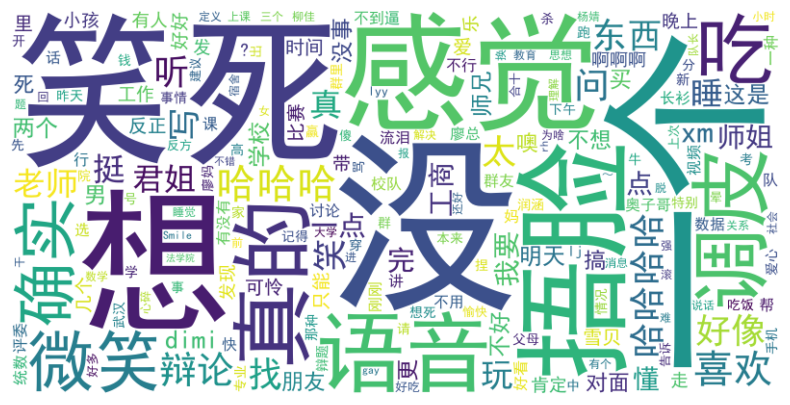

In [10]:
#ËØç‰∫ëÂõæÔºå‰ΩÜÁõÆÂâçÊòØÊâãÂä®Â§ÑÁêÜÁöÑÔºåÂ§çÂà∂ÂøΩÁï•ËøáÂÅúÁî®ËØçÁöÑÈ¢ëÊï∞ÔºåÊääÈ¢ëÊï∞Âèñlog2ÂêéÈô§10ÔºåÂæóÂà∞ËØçÈ¢ëÊîæÂú®cy.xlsxÈáå‰∫Ü
# ËØªÂèñ Excel Êñá‰ª∂
df = pd.read_excel('cy.xlsx')

# ÂàõÂª∫‰∏Ä‰∏™Â≠óÂÖ∏ÔºåÁî®‰∫éÁîüÊàêËØç‰∫ë
word_freq_dict = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))# ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰ΩìÊñá‰ª∂Ë∑ØÂæÑ
font_path = 'simhei.ttf'

# ÁîüÊàêËØç‰∫ë
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_dict)

# ÊòæÁ§∫ËØç‰∫ëÂõæ
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#  ‚Üì‰ºòÂåñËØç‰∫ëÂõæÂÜôÂ•Ω‰∫ÜÂó∑

In [33]:
# ÊâÄÊúâËØçËØ≠ËØçÈ¢ëÁªüËÆ°ÁªìÊûú
data1 = pd.read_excel('cp.xlsx')#ËØçÈ¢ëÊØîËØçÂ∫ìË¶ÅÂ§ö‰∏Ä‰∏™Ê†áÈ¢òË°å
df = data1.head(500)      # ÂèñÂâç‰∫îÂçÅË°åÔºå‰ª£Ë°®Ââç 50 ‰∏™ËØçËØ≠
Words = [(w, f) for w,f in zip(df['ËØçËØ≠'], df['ËØçÈ¢ë'])]
# [('ÂèëÂ±ï', 411),('Âª∫ËÆæ', 349),('ÂÆåÂñÑ', 276),('‰ΩìÁ≥ª', 252),‚Ä¶‚Ä¶]

import pyecharts.options as opts
from pyecharts.charts import WordCloud
#Áî®Êù•Ëß£ÂÜ≥Ê≤°ÊúâaddÂáΩÊï∞ÁöÑ‰∏Ä‰∏™Á•ûÂ•áÊñπÊ≥ï


wordcloud=WordCloud()
# ËØç‰∫ëÂõæËΩÆÂªì(shape)ÔºåÂèØÈÄâÂèÇÊï∞Êúâ‚Äôcircle‚Äô, ‚Äòcardioid‚Äô, ‚Äòdiamond‚Äô, ‚Äòtriangleforward‚Äô, ‚Äòtriangle‚Äô, ‚Äòpentagon‚Äô, ‚Äòstar‚Äô 
wordcloud.add("", Words, shape='circle')

from PIL import Image   #ÂõæÁâáÂ§ÑÁêÜ
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Words_dict = df.set_index('ËØçËØ≠').to_dict()['ËØçÈ¢ë']

img = Image.open('GB.jpg') # Âä†ËΩΩËÉåÊôØÂõæÁâá
img_array = np.array(img)    # Â∞ÜÂõæÁâáÂèò‰∏∫Êï∞ÁªÑÔºå‰æø‰∫éÁî®‰ΩúËØç‰∫ëÂõæÂΩ¢Áä∂

wordcloud = WordCloud(
    mask = img_array,     # ËÆæÁΩÆËÉåÊôØÂõæÔºå‰∏äÈù¢Â∑≤ÁªèÂä†ËΩΩ
    font_path="C:/Windows/Fonts/SimHei.ttf", #ËÆæÁΩÆÂ≠ó‰ΩìÂíåÂ§ßÂ∞è,ËøôÈáå‰ΩøÁî®Èªë‰Ωì
    max_font_size = 220,   # ËØç‰∫ëÂõæ‰∏≠ËØçËØ≠Â≠óÂè∑ÊúÄÂ§ßÂÄº
    min_font_size = 5,    # ËØç‰∫ëÂõæ‰∏≠ËØçËØ≠Â≠óÂè∑ÊúÄÂ∞èÂÄº
    max_words=1400,        # ËÆæÁΩÆËØçËØ≠Êï∞Èáè
    repeat=True,         # ÂΩì max_words Ë∂ÖËøáÊÄªËØçÊï∞ÔºåÊòØÂê¶‰ΩøÁî®ÈáçÂ§çÁöÑËØçËØ≠‰ª£Êõø
    background_color="white", # ËÆæÁΩÆËÉåÊôØÈ¢úËâ≤‰∏∫ÁôΩËâ≤
    width=1200,            # ËÆæÁΩÆÂÆΩÈ´ò
    height=600
    ).generate_from_frequencies(Words_dict)

# Â∞ÜËØç‰∫ëÂõæ‰øùÂ≠òÂà∞Êú¨Âú∞
wordcloud.to_file('gaybarËØç‰∫ëÂõæ.png')

#Ëøô‰∏™ÂèÇÊï∞ÊÑüËßâËøòÂèØ‰ª•Ôºö
#Êï¥‰ΩìÊÄùË∑ØÂ§ßÊ¶ÇÊòØÔºö ËÉåÊôØÂõæÔºöÂÖàÁî®wordÂÜôÂá∫gaybarÔºåÁÑ∂ÂêéËΩ¨pdfËΩ¨GB.jpg ËØ≠ÊñôÂ∫ìÔºögaybarÁöÑÊó∂Èó¥ÁßØÊ∑Ä ËØçÈ¢ëÁªüËÆ°ÔºöÂèØ‰ª•Âú®ÂÖ®Ëá™Âä®Êë∏È±ºÊú∫ÈáåÁøªÂà∞ ÁÑ∂ÂêéË∞ÉÂèÇÂç≥ÂèØ

In [38]:
#‰∏ªÂä®ËØçÈ¢ëÁªüËÆ°ÔºöÂÆöÂêëÊêúÁ¥¢ÊüêËØçÁöÑÂá∫Áé∞È¢ëÁéá
#ÊâãÂä®ÁâàÊú¨
# ÊèêÂèñÊ∂àÊÅØÂÜÖÂÆπ
x_messages = df['Ê∂àÊÅØÂÜÖÂÆπ']

# ÂàùÂßãÂåñ‰∏Ä‰∏™Â≠óÂÖ∏Êù•Â≠òÂÇ®ÊØè‰∏™ÂèëÈÄÅ‰∫∫ÁöÑËØçÊ±áËÆ°Êï∞
word_counts_by_sender = {}

# ÈÅçÂéÜDataFrame‰∏≠ÁöÑÊØè‰∏ÄË°å
for index, row in df.iterrows():
    sender = row['ÂèëÈÄÅ‰∫∫']
    message = row['Ê∂àÊÅØÂÜÖÂÆπ']
    
    # ‰ΩøÁî®jiebaËøõË°åÂàÜËØç
    seg_list = jieba.cut(message)
    
    # Â¶ÇÊûúÂΩìÂâçÂèëÈÄÅ‰∫∫Â∑≤ÁªèÂú®Â≠óÂÖ∏‰∏≠ÔºåÊõ¥Êñ∞ËÆ°Êï∞ÔºõÂê¶ÂàôÔºåÂàõÂª∫Êñ∞ÁöÑËÆ°Êï∞Âô®
    if sender in word_counts_by_sender:
        word_counts_by_sender[sender].update(Counter(seg_list))
    else:
        word_counts_by_sender[sender] = Counter(seg_list)

# ËæìÂÖ•‰Ω†ÊÉ≥Ë¶ÅÁªüËÆ°ÁöÑÁâπÂÆöËØçÊ±á
target_word = 'ÂõæÁâá'

# ËæìÂá∫ÊØè‰∏™ÂèëÈÄÅ‰∫∫‰∏≠ÁâπÂÆöËØçÊ±áÁöÑÂá∫Áé∞Ê¨°Êï∞
for sender, word_count in word_counts_by_sender.items():
    count = word_count.get(target_word, 0)
    print(f' {sender} ËØ¥ "{target_word}" ‰∫Ü {count} Ê¨°')

 Âº†Èí∞Áë∂ ËØ¥ "ÂõæÁâá" ‰∫Ü 77 Ê¨°
 Á≥ªÁªü ËØ¥ "ÂõæÁâá" ‰∫Ü 0 Ê¨°
 ÂªñÂ∞ëË∞¶ ËØ¥ "ÂõæÁâá" ‰∫Ü 790 Ê¨°
 Êù®Â©ß ËØ¥ "ÂõæÁâá" ‰∫Ü 854 Ê¨°
 ÂæêÈì≠ ËØ¥ "ÂõæÁâá" ‰∫Ü 464 Ê¨°
 Âº†Ê∂¶Ê∂µ ËØ¥ "ÂõæÁâá" ‰∫Ü 969 Ê¨°
 Áéã‰Ω≥ ËØ¥ "ÂõæÁâá" ‰∫Ü 28 Ê¨°
 Êü≥‰Ω≥ ËØ¥ "ÂõæÁâá" ‰∫Ü 370 Ê¨°
 ÂàòÂû≠Âêõ ËØ¥ "ÂõæÁâá" ‰∫Ü 291 Ê¨°
 Âº†Ê•öÂΩ¨ ËØ¥ "ÂõæÁâá" ‰∫Ü 210 Ê¨°
 ÂáØÊñáÂ∏àÂÖÑ ËØ¥ "ÂõæÁâá" ‰∫Ü 63 Ê¨°
 ÈÉëÊ¨£ÂÆá ËØ¥ "ÂõæÁâá" ‰∫Ü 5 Ê¨°
 Ê¢ìÂçâÂ∏àÂßê ËØ¥ "ÂõæÁâá" ‰∫Ü 0 Ê¨°


# Ëá™Âä®‰∏ªÂä®ÂÖ≥ÈîÆËØçÊ£ÄÁ¥¢
#‰øÆÊîπtarget„ÄÇxlsxÂç≥ÂèØÂÆåÊàêÂØπ‰∫éÊâÄÈúÄÂÖ≥ÈîÆËØçÁöÑÁªüËÆ°ÂíåÊî∂ÈõÜÔºåËøôÊ†∑‰∏ÄÊù•Â∞±Â§ßÂ§ßÁº©Âáè‰∫ÜÊâÄÈúÄÁöÑÂ∑•‰ΩúÈáè

In [23]:
# ËØªÂèñ2.14bar.xlsxÂíåtarget.xlsxÊñá‰ª∂
bar_df = df
target_df = pd.read_excel('target.xlsx')

# ÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑÊï∞ÊçÆÊ°ÜÔºåÁî®‰∫éÂ≠òÂÇ®ÁªüËÆ°ÁªìÊûúÔºåÊåáÂÆöÂîØ‰∏ÄÁöÑÁ¥¢ÂºïÂàó
result_df = pd.DataFrame(index=bar_df['ÂèëÈÄÅ‰∫∫'].unique(), columns=['ÂèëÈÄÅ‰∫∫'] + list(target_df['ÂÖ≥ÈîÆËØç']))

# ÂØπÊ∂àÊÅØÂÜÖÂÆπËøõË°åÂàÜËØç
bar_df['ÂàÜËØçÂÜÖÂÆπ'] = bar_df['Ê∂àÊÅØÂÜÖÂÆπ'].apply(lambda x: ' '.join(jieba.lcut(str(x))))

# ÈÅçÂéÜÊØè‰∏™ÂèëÈÄÅ‰∫∫
for sender in bar_df['ÂèëÈÄÅ‰∫∫'].unique():
    sender_data = {'ÂèëÈÄÅ‰∫∫': sender}
    
    # ÈÅçÂéÜÂÖ≥ÈîÆËØç
    for keyword in target_df['ÂÖ≥ÈîÆËØç']:
        # Â∞ÜÂÖ≥ÈîÆËØçËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤ÔºåÁÑ∂ÂêéÁªüËÆ°ÂÖ≥ÈîÆËØçÂú®ÂàÜËØçÂÜÖÂÆπ‰∏≠Âá∫Áé∞ÁöÑÊ¨°Êï∞
        count = bar_df[bar_df['ÂèëÈÄÅ‰∫∫'] == sender]['ÂàÜËØçÂÜÖÂÆπ'].str.count(str(keyword)).sum()
        sender_data[keyword] = count
    
    # Â∞ÜÊØè‰∏™ÂèëÈÄÅ‰∫∫ÁöÑÁªüËÆ°ÁªìÊûúÊ∑ªÂä†Âà∞ÁªìÊûúÊï∞ÊçÆÊ°Ü‰∏≠
    result_df.loc[sender] = sender_data

# Â∞ÜÁªìÊûú‰øùÂ≠ò‰∏∫Êñ∞ÁöÑxlsxÊñá‰ª∂
result_df.reset_index(inplace=True)
result_df.to_excel('ÁªüËÆ°ÁªìÊûú.xlsx', index=False)
print("ÊêûÂÆöÔºåÂ∑≤‰øùÂ≠ò")

ÊêûÂÆöÔºåÂ∑≤‰øùÂ≠ò
